<a href="https://colab.research.google.com/github/Meera-Ajay-25/Machine-Learning-projects/blob/main/porter_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2: **Porter delivery time estimation**

Algorithm Used: **Multiple regression**,**Support Vector regression**

Steps:


*   Loading the dataset using pandas library
*   preprocessing the dataset using Excel.


*   Splitting the dataset
*   Model building using Multiple regression Algorithm and Support vector 
    regression


*   Model testing using MSE,MAE,R2-SCORE,RMSE










In [67]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('/content/porter 2.csv')
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,06-02-2015 22:24,06-02-2015 23:27,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,10-02-2015 21:49,10-02-2015 22:56,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,22-01-2015 20:39,22-01-2015 21:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,03-02-2015 21:21,03-02-2015 22:13,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,15-02-2015 02:40,15-02-2015 03:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,17-02-2015 00:19,17-02-2015 01:24,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,13-02-2015 00:01,13-02-2015 00:58,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,24-01-2015 04:46,24-01-2015 05:36,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,01-02-2015 18:18,01-02-2015 19:23,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


In [2]:
df.isna().sum()

market_id                    201
created_at                     0
actual_delivery_time           2
store_id                       0
store_primary_category       945
order_protocol               201
total_items                    0
subtotal                       0
num_distinct_items             0
min_item_price                 0
max_item_price                 1
total_onshift_partners      3030
total_busy_partners         3030
total_outstanding_orders    3030
dtype: int64

In [3]:
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price              float64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

In [4]:
#Converting the date-time to datatype
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])

In [5]:
df.drop(["market_id"],inplace=True,axis=1)
df.drop(["store_id"],inplace=True,axis=1)
df.drop(["store_primary_category"],inplace=True,axis=1)

In [6]:
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,2015-06-02 22:24:00,2015-06-02 23:27:00,1.0,4,3441,4,557,1239.0,33.0,14.0,21.0
1,2015-10-02 21:49:00,2015-10-02 22:56:00,2.0,1,1900,1,1400,1400.0,1.0,2.0,2.0
2,2015-01-22 20:39:00,2015-01-22 21:09:00,1.0,1,1900,1,1900,1900.0,1.0,0.0,0.0
3,2015-03-02 21:21:00,2015-03-02 22:13:00,1.0,6,6900,5,600,1800.0,1.0,1.0,2.0
4,2015-02-15 02:40:00,2015-02-15 03:20:00,1.0,3,3900,3,1100,1600.0,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
39606,2015-02-18 02:38:00,2015-02-18 03:28:00,4.0,4,3165,4,450,895.0,0.0,0.0,0.0
39607,2015-06-02 02:59:00,2015-06-02 03:32:00,1.0,1,795,1,795,795.0,0.0,0.0,0.0
39608,2015-10-02 23:32:00,2015-11-02 00:08:00,2.0,1,1345,1,895,895.0,0.0,0.0,0.0
39609,2015-02-02 05:24:00,2015-02-02 06:28:00,4.0,7,1365,7,0,575.0,NaN,NaN,NaN


In [7]:
#Delivery time 
df['created_at'] = df['actual_delivery_time'] - df['created_at']
#Delivery time in minutes
from datetime import timedelta
df['created_at'] = df['created_at'] /timedelta(minutes=1)
df.drop(["actual_delivery_time"],inplace=True,axis=1)

In [8]:
df['min_item_price'] = (df['min_item_price'] + df['max_item_price']) / 2
df.drop(["max_item_price"],inplace=True,axis=1)

In [9]:
df = df.rename(columns={'created_at': 'del_time'})
df = df.rename(columns={'min_item_price': 'avg_amount'})

In [10]:
df

,del_time,order_protocol,total_items,subtotal,num_distinct_items,avg_amount,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,63.0,1.0,4,3441,4,898.0,33.0,14.0,21.0
1,67.0,2.0,1,1900,1,1400.0,1.0,2.0,2.0
2,30.0,1.0,1,1900,1,1900.0,1.0,0.0,0.0
3,52.0,1.0,6,6900,5,1200.0,1.0,1.0,2.0
4,40.0,1.0,3,3900,3,1350.0,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...
39606,50.0,4.0,4,3165,4,672.5,0.0,0.0,0.0
39607,33.0,1.0,1,795,1,795.0,0.0,0.0,0.0
39608,43236.0,2.0,1,1345,1,895.0,0.0,0.0,0.0
39609,64.0,4.0,7,1365,7,287.5,NaN,NaN,NaN


In [11]:
#using dropna removing columns with null values
df = df.dropna()

In [12]:
#removing negative values
df = df[df >= 0].dropna()

In [13]:
df.isna().sum()

del_time                    0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
avg_amount                  0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [14]:
df

,del_time,order_protocol,total_items,subtotal,num_distinct_items,avg_amount,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,63.0,1.0,4,3441,4,898.0,33.0,14.0,21.0
1,67.0,2.0,1,1900,1,1400.0,1.0,2.0,2.0
2,30.0,1.0,1,1900,1,1900.0,1.0,0.0,0.0
3,52.0,1.0,6,6900,5,1200.0,1.0,1.0,2.0
4,40.0,1.0,3,3900,3,1350.0,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...
39604,65.0,2.0,3,1980,3,612.5,0.0,0.0,0.0
39605,69.0,2.0,2,1470,2,622.5,0.0,0.0,0.0
39606,50.0,4.0,4,3165,4,672.5,0.0,0.0,0.0
39607,33.0,1.0,1,795,1,795.0,0.0,0.0,0.0


In [83]:
df.duplicated().sum()

0

**Exploratory Data Analysis**

<Axes: xlabel='order_protocol', ylabel='count'>

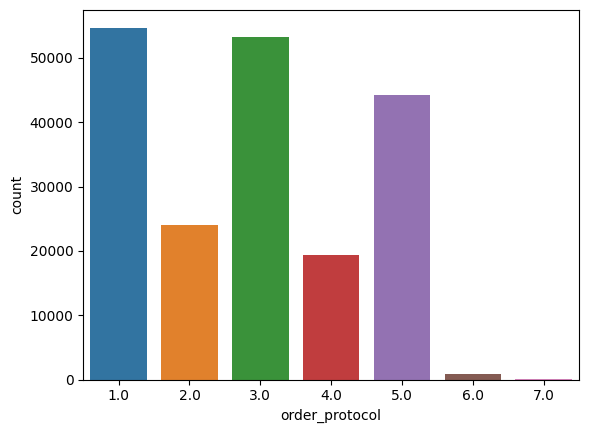

In [68]:
sns.countplot(x='order_protocol',data=df)

<ipython-input-87-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

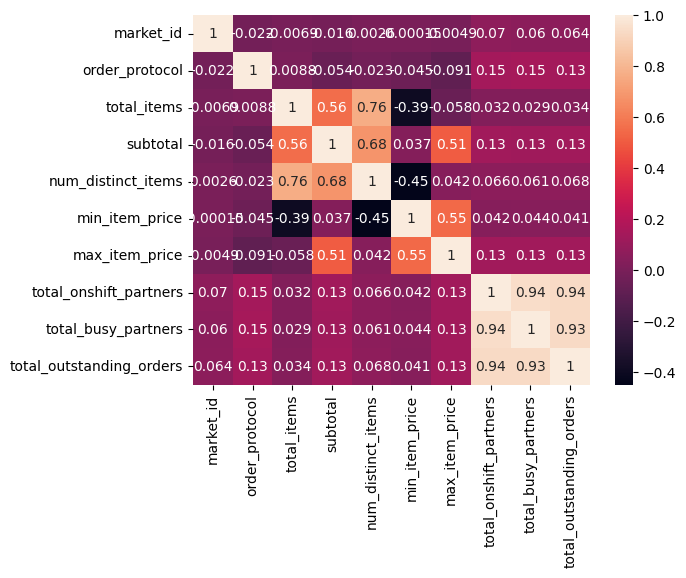

In [87]:
sns.heatmap(df.corr(), annot=True)

Here order protocol shows how the order was placed : through porter, call to restaurant, pre booked, third part. we can see that maximum orders were placed **through porter** only,followed by **prebooked**. 
From the heatmap we can see a high positive correlation between total_onshift_partners, total_busy_partners	and total_outstanding_orders also between minimum price and maximum price. Then between min_price and max_price. Hence we found the average of both min_price and max_price.

In [41]:
X=df.iloc[:,1:]
y=df.iloc[:,1]

In [42]:
#scaling the dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)

In [57]:
#Performing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3,random_state=0)

In [58]:
X_train.shape

(25408, 8)

In [59]:
y_train.shape

(25408,)

In [60]:
#model building using Multiple regression
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred=mlr.predict(X_test)
y_pred

array([5., 2., 1., ..., 1., 3., 1.])

In [62]:
y_test.values

array([5., 2., 1., ..., 1., 3., 1.])

In [63]:
#Comparing Actual and predicted Values
Result=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
Result

,Actual Values,Predicted Values
17327,5.0,5.0
22846,2.0,2.0
21055,1.0,1.0
19015,5.0,5.0
27546,3.0,3.0
...,...,...
2430,1.0,1.0
16100,1.0,1.0
24600,1.0,1.0
39140,3.0,3.0


In [64]:
#model validation
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))


mean absolute error: 2.5133420495310603e-14
mean squared error: 6.526925169633158e-28
root mean squared error: 2.5547847599422458e-14
r2-score: 1.0


In [65]:
#SVR MODEL BUILDING
from sklearn.svm import SVR
sv=SVR()
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
y_pred1

array([5.06409919, 1.9188064 , 1.03855765, ..., 0.97424928, 3.0104553 ,
       0.97474952])

In [66]:
#SVR PERFORMANCE_MEASURE
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("mean absolute error",mean_absolute_error(y_test,y_pred1))
print("mean squred error",mean_squared_error(y_test,y_pred1))
print("root mean squred error",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("r2_score",r2_score(y_test,y_pred1))

mean absolute error 0.03876463997580309
mean squred error 0.002503474466714436
root mean squred error 0.05003473260360683
r2_score 0.9988760249873132


In [92]:
#prediction using mlr
import warnings
warnings.filterwarnings('ignore')
y_new=mlr.predict(ms.transform([[5,1,3660,1,600,52,48,40]]))
y_new

array([5.])

In [93]:
#prediction using svr
import warnings
warnings.filterwarnings('ignore')
y_new=sv.predict(ms.transform([[5,1,3660,1,600,52,48,40]]))
y_new

array([4.92584866])

Here we can see after prediction of new values using multiple linear regression and support vector machine we are getting approximate delivery time as **5 minutes and 4 minutes** approximately